In [25]:
import jieba
import jieba.analyse
str1 = "设计并制作一个从二进制基带信号中提取位同步时钟的电路，并能测定和显示提取出的位同步时钟频率，设计制作的电路组成框图如图 1 所示。"
list1 = jieba.cut(str1)
print(list(list1))
jieba.analyse.extract_tags(str1, topK=20, withWeight=False, allowPOS=())

['设计', '并', '制作', '一个', '从', '二进制', '基带', '信号', '中', '提取', '位', '同步', '时钟', '的', '电路', '，', '并', '能', '测定', '和', '显示', '提取', '出', '的', '位', '同步', '时钟', '频率', '，', '设计', '制作', '的', '电路', '组成', '框图', '如图', ' ', '1', ' ', '所示', '。']


['时钟',
 '电路',
 '提取',
 '同步',
 '制作',
 '框图',
 '基带',
 '设计',
 '二进制',
 '所示',
 '如图',
 '测定',
 '频率',
 '信号',
 '组成',
 '显示',
 '一个']

In [26]:
import pandas
import re
import nltk
from nltk.corpus import stopwords

In [27]:
import numpy as np
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

In [28]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [29]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


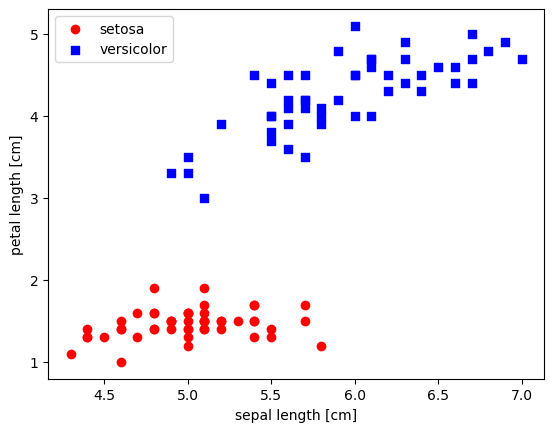

In [30]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

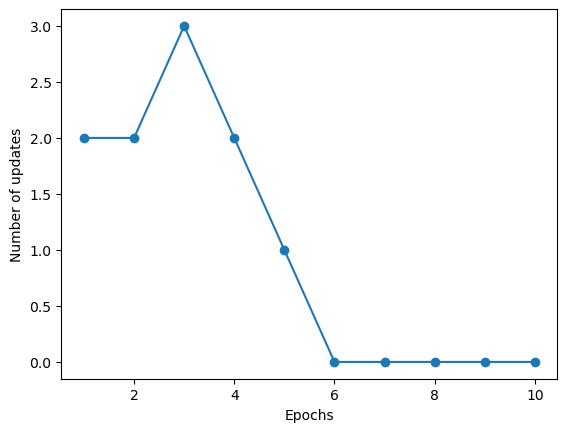

In [37]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [38]:
#可视化
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.22):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class{cl}', edgecolor = 'black')
        

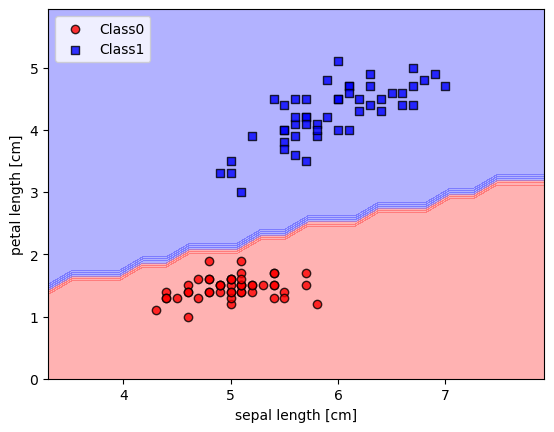

In [39]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()